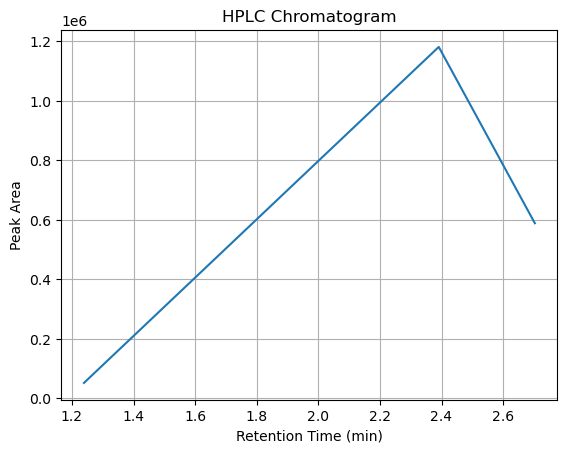

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your data in a list or DataFrame format
rt = [1.239, 2.391, 2.703]  # Retention times
area = [51783.9, 1181447.3, 588632.3]  # Peak areas

# Create the plot
plt.plot(rt, area)

# Customize the plot
plt.xlabel('Retention Time (min)')
plt.ylabel('Peak Area')
plt.title('HPLC Chromatogram')
plt.grid(True)

# Show the plot
plt.show()

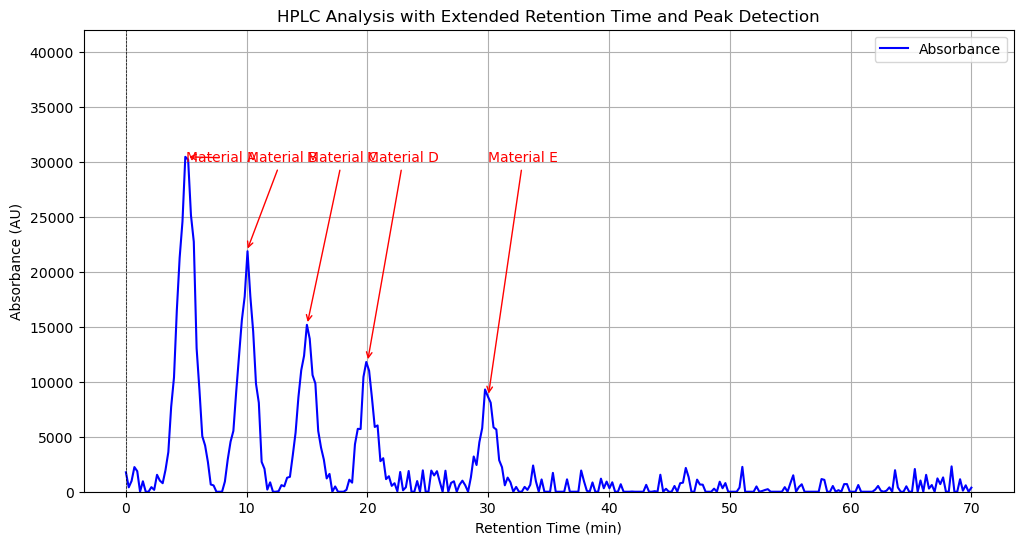

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate dummy HPLC data
np.random.seed(0)  # For reproducibility
retention_time = np.linspace(0, 70, 300)  # Retention time from 0 to 70 minutes

# Create synthetic absorbance data with peaks
absorbance = (
    30000 * np.exp(-(retention_time - 5)**2) +  # Major peak for Material A
    20000 * np.exp(-(retention_time - 10)**2) +  # Major peak for Material B
    15000 * np.exp(-(retention_time - 15)**2) +  # Major peak for Material C
    10000 * np.exp(-(retention_time - 20)**2) +  # Minor peak for Material D
    8000 * np.exp(-(retention_time - 30)**2) +  # Minor peak for Material E
    np.random.normal(0, 1000, retention_time.shape)  # Add some noise
)

# Scale the absorbance to ensure it is within the range of 0 to 40,000
absorbance = np.clip(absorbance, 0, 40000)

# Create a DataFrame
data = pd.DataFrame({'Retention Time': retention_time, 'Absorbance': absorbance})

# Identify peaks for annotation
peak_positions = [5, 10, 15, 20, 30]
peak_labels = ['Material A', 'Material B', 'Material C', 'Material D', 'Material E']

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(data['Retention Time'], data['Absorbance'], color='blue', label='Absorbance')
plt.title('HPLC Analysis with Extended Retention Time and Peak Detection')
plt.xlabel('Retention Time (min)')
plt.ylabel('Absorbance (AU)')
plt.ylim(0, 42000)  # Set y-axis limit for better visualization
plt.grid()
plt.axhline(0, color='black', lw=0.5, ls='--')  # Add horizontal line at y=0
plt.axvline(0, color='black', lw=0.5, ls='--')  # Add vertical line at x=0

# Annotate peaks
for peak, label in zip(peak_positions, peak_labels):
    plt.annotate(label, xy=(peak, absorbance[np.argmin(np.abs(retention_time - peak))]), 
                     xytext=(peak, 30000),  # Adjust text position for clarity
                     arrowprops=dict(arrowstyle='->', color='red'),
                     fontsize=10, color='red')

plt.legend()
plt.savefig('hplc_plot_extended.png', dpi=300)  # Save the plot as a PNG file
plt.show()


Material A: Area = 53332.98, Concentration = 533.33
Material B: Area = 34112.82, Concentration = 227.42
Material C: Area = 25173.77, Concentration = 125.87
Material D: Area = 18540.49, Concentration = 74.16
Material E: Area = 14624.76, Concentration = 48.75


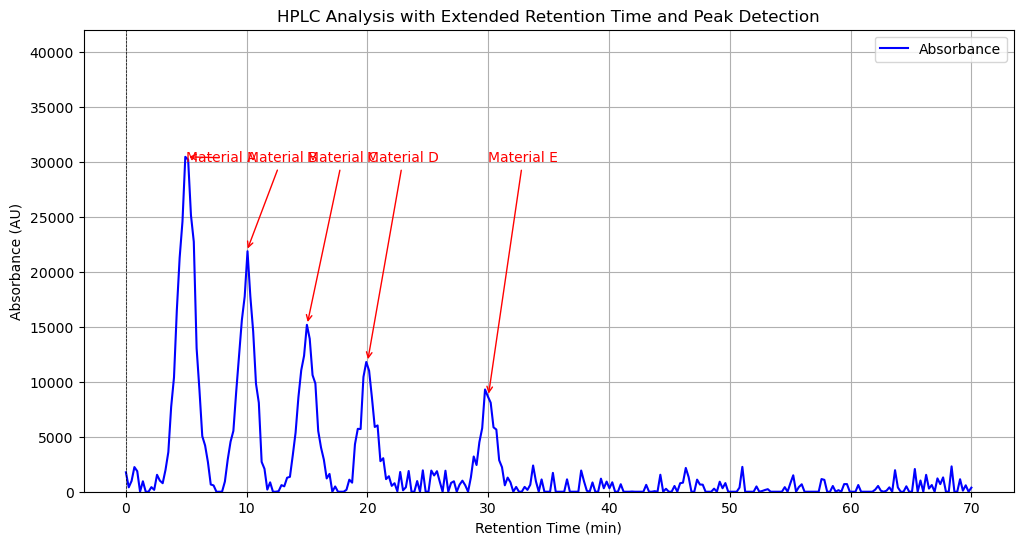

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate dummy HPLC data
np.random.seed(0)  # For reproducibility
retention_time = np.linspace(0, 70, 300)  # Retention time from 0 to 70 minutes

# Create synthetic absorbance data with peaks
absorbance = (
    30000 * np.exp(-(retention_time - 5)**2) +  # Major peak for Material A
    20000 * np.exp(-(retention_time - 10)**2) +  # Major peak for Material B
    15000 * np.exp(-(retention_time - 15)**2) +  # Major peak for Material C
    10000 * np.exp(-(retention_time - 20)**2) +  # Minor peak for Material D
    8000 * np.exp(-(retention_time - 30)**2) +  # Minor peak for Material E
    np.random.normal(0, 1000, retention_time.shape)  # Add some noise
)

# Scale the absorbance to ensure it is within the range of 0 to 40,000
absorbance = np.clip(absorbance, 0, 40000)

# Create a DataFrame
data = pd.DataFrame({'Retention Time': retention_time, 'Absorbance': absorbance})

# Identify peaks for annotation
peak_positions = [5, 10, 15, 20, 30]
peak_labels = ['Material A', 'Material B', 'Material C', 'Material D', 'Material E']

# Calculate area under the peaks using trapezoidal rule
areas = []
for peak in peak_positions:
    # Define the range for area calculation
    idx = np.where((retention_time >= peak - 2) & (retention_time <= peak + 2))  # ±2 minutes from peak
    area = np.trapz(data['Absorbance'].iloc[idx], data['Retention Time'].iloc[idx])
    areas.append(area)

# Define k-factors for each material (these are example values)
k_factors = {
    'Material A': 100,  # Example k-factor for Material A
    'Material B': 150,  # Example k-factor for Material B
    'Material C': 200,  # Example k-factor for Material C
    'Material D': 250,  # Example k-factor for Material D
    'Material E': 300   # Example k-factor for Material E
}

# Calculate concentrations
concentrations = {label: area / k_factors[label] for label, area in zip(peak_labels, areas)}

# Print areas and concentrations
for label, area, concentration in zip(peak_labels, areas, concentrations.values()):
    print(f"{label}: Area = {area:.2f}, Concentration = {concentration:.2f}")

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(data['Retention Time'], data['Absorbance'], color='blue', label='Absorbance')
plt.title('HPLC Analysis with Extended Retention Time and Peak Detection')
plt.xlabel('Retention Time (min)')
plt.ylabel('Absorbance (AU)')
plt.ylim(0, 42000)  # Set y-axis limit for better visualization
plt.grid()
plt.axhline(0, color='black', lw=0.5, ls='--')  # Add horizontal line at y=0
plt.axvline(0, color='black', lw=0.5, ls='--')  # Add vertical line at x=0

# Annotate peaks
for peak, label in zip(peak_positions, peak_labels):
    plt.annotate(label, xy=(peak, absorbance[np.argmin(np.abs(retention_time - peak))]), 
                     xytext=(peak, 30000),  # Adjust text position for clarity
                     arrowprops=dict(arrowstyle='->', color='red'),
                     fontsize=10, color='red')

plt.legend()
plt.savefig('hplc_plot_extended_with_areas.png', dpi=300)  # Save the plot as a PNG file
plt.show()


In [110]:
file_path = "C:\\Users\\mirza\\OneDrive\\Desktop\\Book1.csv"

Material A: Area = 1500.00, Concentration = 15.00 mg/L
Material B: Area = 1200.00, Concentration = 8.00 mg/L
Material C: Area = 900.00, Concentration = 4.50 mg/L
Material D: Area = 700.00, Concentration = 2.80 mg/L
Material E: Area = 500.00, Concentration = 1.67 mg/L


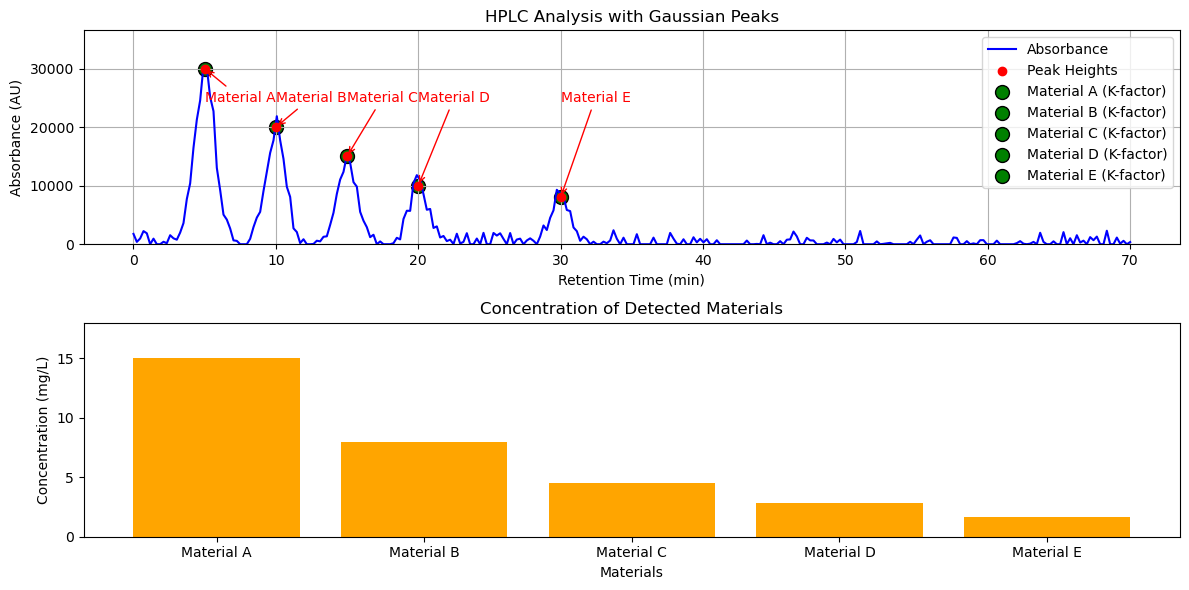

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)  # For reproducibility
retention_time = np.linspace(0, 70, 300)  # Retention time from 0 to 70 minutes

# Create synthetic absorbance data with peaks
absorbance = (
    30000 * np.exp(-(retention_time - 5)**2) +  # Major peak for Material A
    20000 * np.exp(-(retention_time - 10)**2) +  # Major peak for Material B
    15000 * np.exp(-(retention_time - 15)**2) +  # Major peak for Material C
    10000 * np.exp(-(retention_time - 20)**2) +  # Minor peak for Material D
    8000 * np.exp(-(retention_time - 30)**2) +   # Minor peak for Material E
    np.random.normal(0, 1000, retention_time.shape)  # Add some noise
)

# Scale the absorbance to ensure it is within the range of 0 to 40,000
absorbance = np.clip(absorbance, 0, 40000)

# Create a DataFrame with synthetic data
data = pd.DataFrame({'Retention Time (min)': retention_time, 'Absorbance': absorbance})

# Extract retention time and absorbance
retention_time = data['Retention Time (min)']
absorbance = data['Absorbance']

# Define peak heights and areas for calculation
peak_heights = [30000, 20000, 15000, 10000, 8000]  # Example heights corresponding to peaks
areas = [1500, 1200, 900, 700, 500]  # Example areas corresponding to peaks
peak_labels = ['Material A', 'Material B', 'Material C', 'Material D', 'Material E']

# Define k-factors for each material (these are example values)
k_factors = {
    'Material A': 100,  # Example k-factor for Material A
    'Material B': 150,  # Example k-factor for Material B
    'Material C': 200,  # Example k-factor for Material C
    'Material D': 250,  # Example k-factor for Material D
    'Material E': 300   # Example k-factor for Material E
}

# Calculate concentrations
concentrations = {}
for label, area in zip(peak_labels, areas):
    if label in k_factors:
        concentrations[label] = area / k_factors[label]
    else:
        concentrations[label] = None  # No k-factor provided

# Print areas and concentrations
for label, area_val, concentration in zip(peak_labels, areas, concentrations.values()):
    if concentration is not None:
        print(f"{label}: Area = {area_val:.2f}, Concentration = {concentration:.2f} mg/L")
    else:
        print(f"{label}: Area = {area_val:.2f}, Concentration = Not available (no k-factor)")

# Plotting the data
plt.figure(figsize=(12, 6))

# Plot the absorbance peaks
plt.subplot(2, 1, 1)  # First subplot for absorbance peaks
plt.plot(retention_time, absorbance, color='blue', label='Absorbance')
plt.scatter([5, 10, 15, 20, 30], peak_heights, color='red', label='Peak Heights', zorder=5)  # Mark peak heights
plt.title('HPLC Analysis with Gaussian Peaks')
plt.xlabel('Retention Time (min)')
plt.ylabel('Absorbance (AU)')
plt.ylim(0, max(absorbance) * 1.2)  # Set y-axis limit for better visualization
plt.grid()
plt.axhline(0, color='black', lw=0.5, ls='--')  # Add horizontal line at y=0

# Annotate peaks
for peak, label in zip([5, 10, 15, 20, 30], peak_labels):
    plt.annotate(label, xy=(peak, peak_heights[peak_labels.index(label)]), 
                 xytext=(peak, max(absorbance) * 0.8),  # Adjust text position for clarity
                 arrowprops=dict(arrowstyle='->', color='red'),
                 fontsize=10, color='red')

# Highlight peaks with K-factors
for label, peak in zip(peak_labels, [5, 10, 15, 20, 30]):
    if label in k_factors:
        plt.scatter(peak, peak_heights[peak_labels.index(label)], 
                    color='green', marker='o', s=100, edgecolor='black', label=f'{label} (K-factor)')

plt.legend()

# Plotting concentrations
plt.subplot(2, 1, 2)  # Second subplot for concentrations
plt.bar(peak_labels, [concentration if concentration is not None else 0 for concentration in concentrations.values()], color='orange')
plt.title('Concentration of Detected Materials')
plt.xlabel('Materials')
plt.ylabel('Concentration (mg/L)')  # Adjust units as necessary
plt.ylim(0, max([concentration if concentration is not None else 0 for concentration in concentrations.values()]) * 1.2)  # Set y-axis limit for better visualization
plt.grid(False)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig('hplc_analysis_plot_with_k_factors.png', dpi=300)  # Save the plot as a PNG file
plt.show()


Material A: Area = 1500.00, Concentration = 15.00 mg/L
Material B: Area = 1200.00, Concentration = 8.00 mg/L
Material C: Area = 900.00, Concentration = 4.50 mg/L
Material D: Area = 700.00, Concentration = 2.80 mg/L
Material E: Area = 500.00, Concentration = 1.67 mg/L


C:\Users\mirza\AppData\Local\Temp\ipykernel_8204\212585599.py:101: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Concentration', y='Material', data=concentration_data, palette='muted', ci=None)


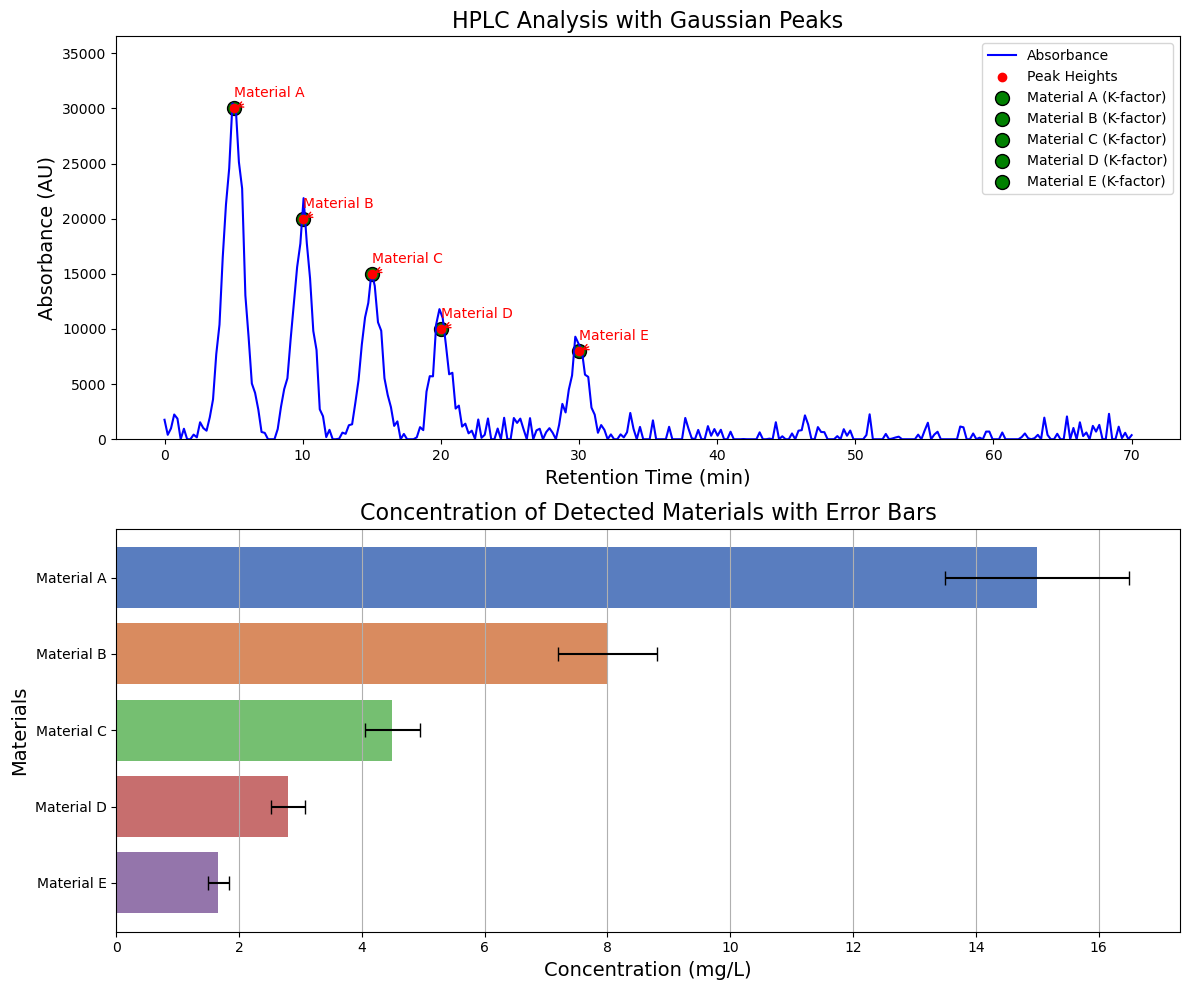

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
np.random.seed(0)  # For reproducibility
retention_time = np.linspace(0, 70, 300)  # Retention time from 0 to 70 minutes

# Create synthetic absorbance data with peaks
absorbance = (
    30000 * np.exp(-(retention_time - 5)**2) +  # Major peak for Material A
    20000 * np.exp(-(retention_time - 10)**2) +  # Major peak for Material B
    15000 * np.exp(-(retention_time - 15)**2) +  # Major peak for Material C
    10000 * np.exp(-(retention_time - 20)**2) +  # Minor peak for Material D
    8000 * np.exp(-(retention_time - 30)**2) +   # Minor peak for Material E
    np.random.normal(0, 1000, retention_time.shape)  # Add some noise
)

# Scale the absorbance to ensure it is within the range of 0 to 40,000
absorbance = np.clip(absorbance, 0, 40000)

# Create a DataFrame with synthetic data
data = pd.DataFrame({'Retention Time (min)': retention_time, 'Absorbance': absorbance})

# Extract retention time and absorbance
retention_time = data['Retention Time (min)']
absorbance = data['Absorbance']

# Define peak heights and areas for calculation
peak_heights = [30000, 20000, 15000, 10000, 8000]  # Example heights corresponding to peaks
areas = [1500, 1200, 900, 700, 500]  # Example areas corresponding to peaks
peak_labels = ['Material A', 'Material B', 'Material C', 'Material D', 'Material E']

# Define k-factors for each material (these are example values)
k_factors = {
    'Material A': 100,  # Example k-factor for Material A
    'Material B': 150,  # Example k-factor for Material B
    'Material C': 200,  # Example k-factor for Material C
    'Material D': 250,  # Example k-factor for Material D
    'Material E': 300   # Example k-factor for Material E
}

# Calculate concentrations
concentrations = {}
for label, area in zip(peak_labels, areas):
    if label in k_factors:
        concentrations[label] = area / k_factors[label]
    else:
        concentrations[label] = None  # No k-factor provided

# Simulate error values for concentrations (for demonstration purposes)
errors = np.array([0.1 * concentration if concentration is not None else 0 for concentration in concentrations.values()])

# Print areas and concentrations
for label, area_val, concentration in zip(peak_labels, areas, concentrations.values()):
    if concentration is not None:
        print(f"{label}: Area = {area_val:.2f}, Concentration = {concentration:.2f} mg/L")
    else:
        print(f"{label}: Area = {area_val:.2f}, Concentration = Not available (no k-factor)")

# Plotting the data
plt.figure(figsize=(12, 10))

# Plot the absorbance peaks
plt.subplot(2, 1, 1)  # First subplot for absorbance peaks
plt.plot(retention_time, absorbance, color='blue', label='Absorbance')
plt.scatter([5, 10, 15, 20, 30], peak_heights, color='red', label='Peak Heights', zorder=5)  # Mark peak heights
plt.title('HPLC Analysis with Gaussian Peaks', fontsize=16)
plt.xlabel('Retention Time (min)', fontsize=14)
plt.ylabel('Absorbance (AU)', fontsize=14)
plt.ylim(0, max(absorbance) * 1.2)  # Set y-axis limit for better visualization
plt.grid(False)
plt.axhline(0, color='black', lw=0.5, ls='--')  # Add horizontal line at y=0

# Annotate peaks more accurately
for peak, label in zip([5, 10, 15, 20, 30], peak_labels):
    y_pos = peak_heights[peak_labels.index(label)] + 1000  # Slightly above the peak for clarity
    plt.annotate(label, xy=(peak, peak_heights[peak_labels.index(label)]), 
                 xytext=(peak, y_pos),  # Adjust text position for clarity
                 arrowprops=dict(arrowstyle='->', color='red'),
                 fontsize=10, color='red')

# Highlight peaks with K-factors
for label, peak in zip(peak_labels, [5, 10, 15, 20, 30]):
    if label in k_factors:
        plt.scatter(peak, peak_heights[peak_labels.index(label)], 
                    color='green', marker='o', s=100, edgecolor='black', label=f'{label} (K-factor)')

plt.legend()

# Create a DataFrame for concentrations to plot a horizontal bar plot
concentration_data = pd.DataFrame({
    'Material': peak_labels,
    'Concentration': [concentration if concentration is not None else 0 for concentration in concentrations.values()],
    'Error': errors
})

# Improved Horizontal Bar Plot with Error Bars
plt.subplot(2, 1, 2)  # Second subplot for concentrations
sns.barplot(x='Concentration', y='Material', data=concentration_data, palette='muted', ci=None)
plt.errorbar(concentration_data['Concentration'], concentration_data['Material'], 
             xerr=concentration_data['Error'], fmt='none', c='black', capsize=5)

plt.title('Concentration of Detected Materials with Error Bars', fontsize=16)
plt.xlabel('Concentration (mg/L)', fontsize=14)
plt.ylabel('Materials', fontsize=14)
plt.grid(axis='x')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig('hplc_analysis_horizontal_bar_plot_with_error_bars.png', dpi=300)  # Save the plot as a PNG file
plt.show()


Material A: Area = 1500.00, Concentration = 15.00 mg/Kg
Material B: Area = 1200.00, Concentration = 8.00 mg/Kg
Material C: Area = 900.00, Concentration = 4.50 mg/Kg
Material D: Area = 700.00, Concentration = 2.80 mg/Kg
Material E: Area = 500.00, Concentration = 1.67 mg/Kg


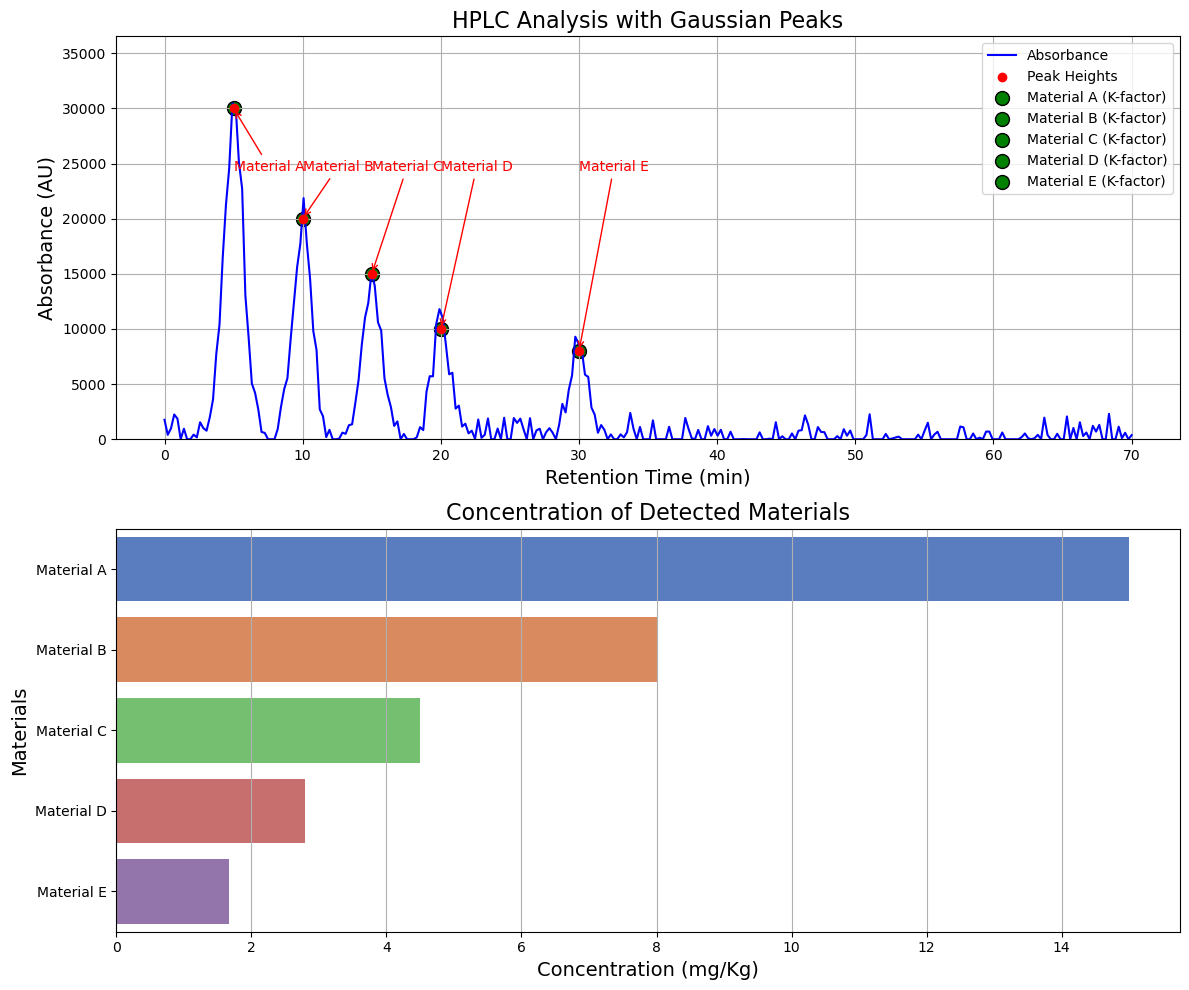

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
np.random.seed(0)  # For reproducibility
retention_time = np.linspace(0, 70, 300)  # Retention time from 0 to 70 minutes

# Create synthetic absorbance data with peaks
absorbance = (
    30000 * np.exp(-(retention_time - 5)**2) +  # Major peak for Material A
    20000 * np.exp(-(retention_time - 10)**2) +  # Major peak for Material B
    15000 * np.exp(-(retention_time - 15)**2) +  # Major peak for Material C
    10000 * np.exp(-(retention_time - 20)**2) +  # Minor peak for Material D
    8000 * np.exp(-(retention_time - 30)**2) +   # Minor peak for Material E
    np.random.normal(0, 1000, retention_time.shape)  # Add some noise
)

# Scale the absorbance to ensure it is within the range of 0 to 40,000
absorbance = np.clip(absorbance, 0, 40000)

# Create a DataFrame with synthetic data
data = pd.DataFrame({'Retention Time (min)': retention_time, 'Absorbance': absorbance})

# Extract retention time and absorbance
retention_time = data['Retention Time (min)']
absorbance = data['Absorbance']

# Define peak heights and areas for calculation
peak_heights = [30000, 20000, 15000, 10000, 8000]  # Example heights corresponding to peaks
areas = [1500, 1200, 900, 700, 500]  # Example areas corresponding to peaks
peak_labels = ['Material A', 'Material B', 'Material C', 'Material D', 'Material E']

# Define k-factors for each material (these are example values)
k_factors = {
    'Material A': 100,  # Example k-factor for Material A
    'Material B': 150,  # Example k-factor for Material B
    'Material C': 200,  # Example k-factor for Material C
    'Material D': 250,  # Example k-factor for Material D
    'Material E': 300   # Example k-factor for Material E
}

# Calculate concentrations
concentrations = {}
for label, area in zip(peak_labels, areas):
    if label in k_factors:
        concentrations[label] = area / k_factors[label]
    else:
        concentrations[label] = None  # No k-factor provided

# Print areas and concentrations
for label, area_val, concentration in zip(peak_labels, areas, concentrations.values()):
    if concentration is not None:
        print(f"{label}: Area = {area_val:.2f}, Concentration = {concentration:.2f} mg/Kg")
    else:
        print(f"{label}: Area = {area_val:.2f}, Concentration = Not available (no k-factor)")

# Plotting the data
plt.figure(figsize=(12, 10))

# Plot the absorbance peaks
plt.subplot(2, 1, 1)  # First subplot for absorbance peaks
plt.plot(retention_time, absorbance, color='blue', label='Absorbance')
plt.scatter([5, 10, 15, 20, 30], peak_heights, color='red', label='Peak Heights', zorder=5)  # Mark peak heights
plt.title('HPLC Analysis with Gaussian Peaks', fontsize=16)
plt.xlabel('Retention Time (min)', fontsize=14)
plt.ylabel('Absorbance (AU)', fontsize=14)
plt.ylim(0, max(absorbance) * 1.2)  # Set y-axis limit for better visualization
plt.grid()
plt.axhline(0, color='black', lw=0.5, ls='--')  # Add horizontal line at y=0

# Annotate peaks
for peak, label in zip([5, 10, 15, 20, 30], peak_labels):
    plt.annotate(label, xy=(peak, peak_heights[peak_labels.index(label)]), 
                 xytext=(peak, max(absorbance) * 0.8),  # Adjust text position for clarity
                 arrowprops=dict(arrowstyle='->', color='red'),
                 fontsize=10, color='red')

# Highlight peaks with K-factors
for label, peak in zip(peak_labels, [5, 10, 15, 20, 30]):
    if label in k_factors:
        plt.scatter(peak, peak_heights[peak_labels.index(label)], 
                    color='green', marker='o', s=100, edgecolor='black', label=f'{label} (K-factor)')

plt.legend()

# Create a DataFrame for concentrations to plot a horizontal bar plot
concentration_data = pd.DataFrame({
    'Material': peak_labels,
    'Concentration': [concentration if concentration is not None else 0 for concentration in concentrations.values()]
})

# Improved Horizontal Bar Plot
plt.subplot(2, 1, 2)  # Second subplot for concentrations
sns.barplot(x='Concentration', y='Material', data=concentration_data, palette='muted')
plt.title('Concentration of Detected Materials', fontsize=16)
plt.xlabel('Concentration (mg/Kg)', fontsize=14)
plt.ylabel('Materials', fontsize=14)
plt.grid(axis='x')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig('hplc_analysis_horizontal_bar_plot.png', dpi=300)  # Save the plot as a PNG file
plt.show()


In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# import os

# Load data from CSV   # Replace with your actual file path
data = pd.read_excel("D:\\Study\\Study and Extras\\Dr Nawaz Sb Paper\\SanaNaaz_Mussab_article\\HPLC-DATA.xlsx", sheet_name='16')

c:\Users\mirza\miniconda3\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mirza\miniconda3\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mirza\AppData\Local\Temp\ipykernel_8204\3283221531.py:85: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Concentration', y='Material', data=concentration_data, palette='muted', ax=axs[2], ci=None)


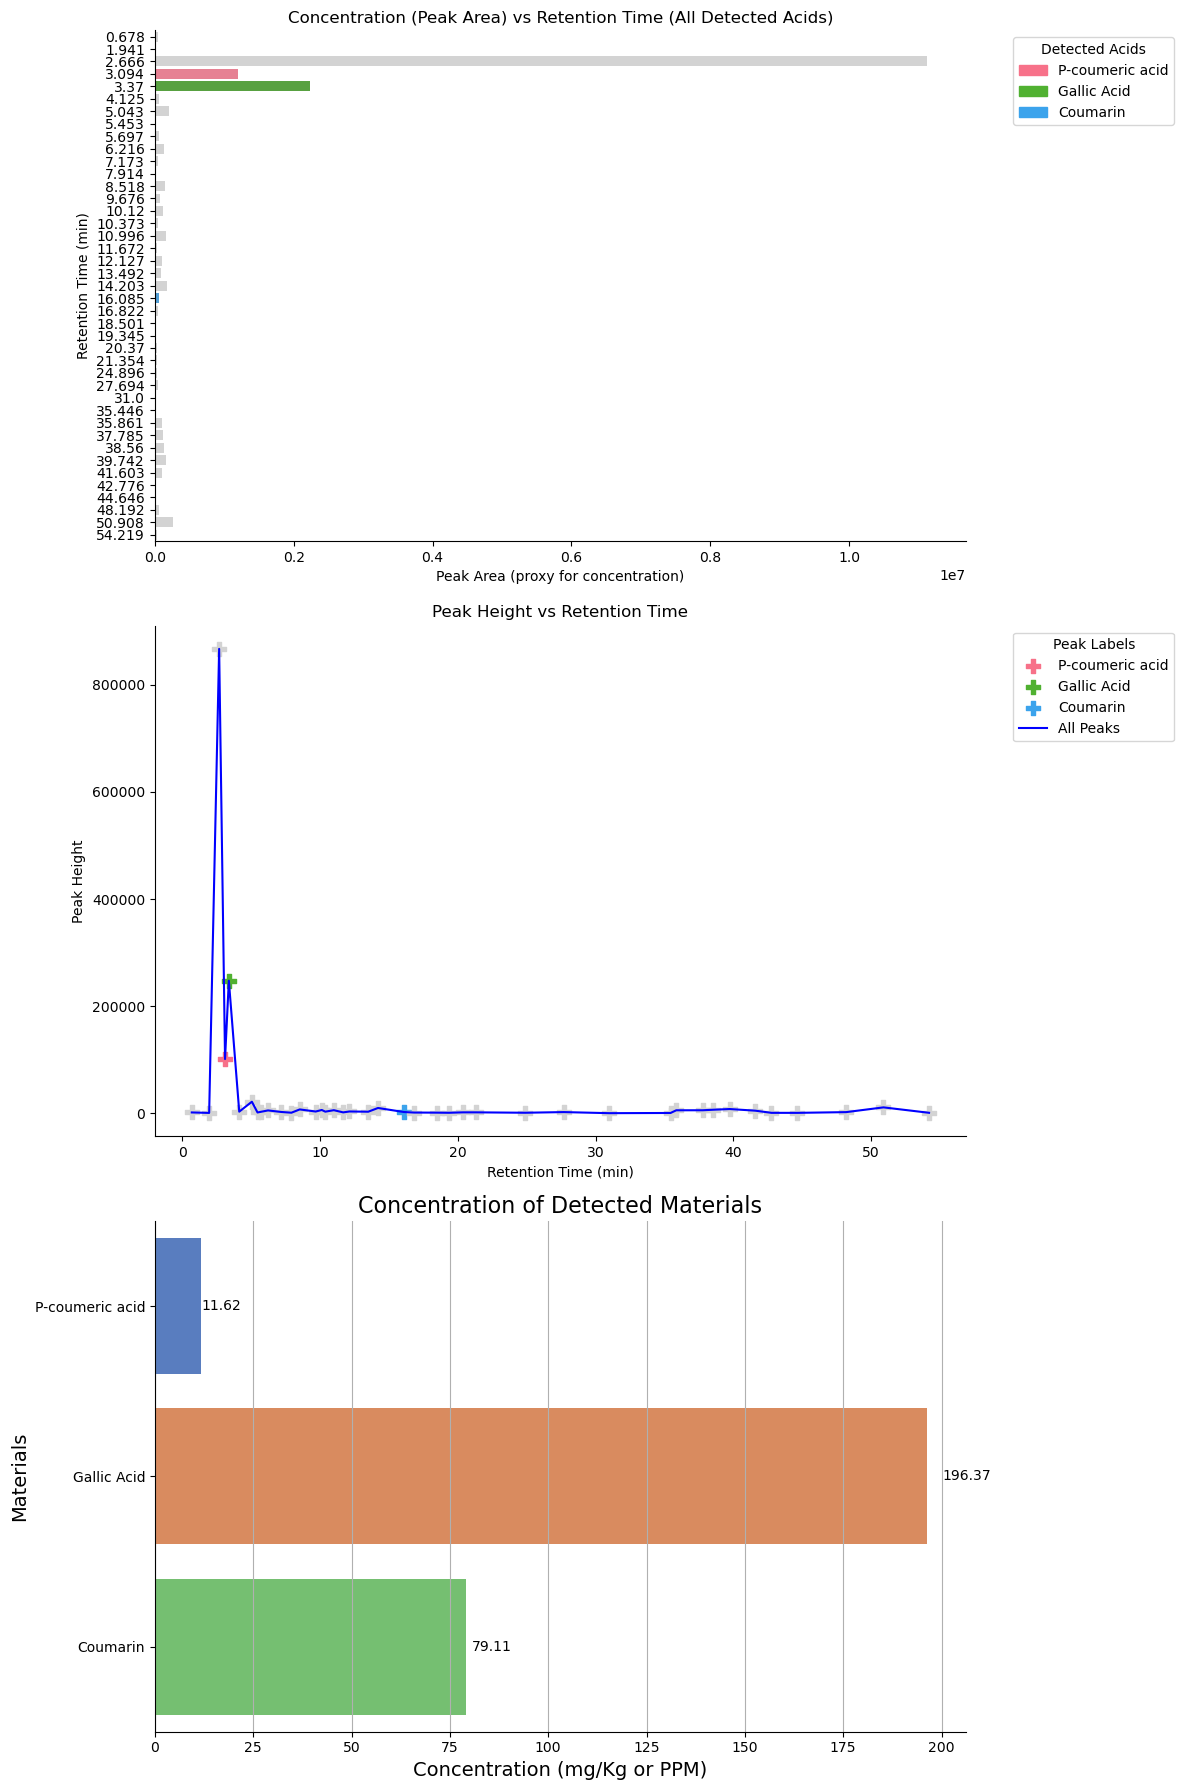

In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Load your data here
# data = pd.read_csv('your_data.csv')  # Uncomment and modify this line to load your data

# Assuming data is already loaded and preprocessed
# Calculate concentration by multiplying the peak area with k_factor
data['concentration'] = data['areas'] * data['k_factor']

# Identify labeled peaks only (removing unknown values)
labeled_peaks = data.dropna(subset=['peak_labels'])

# Determine colors for detected and non-detected acids
unique_acids = labeled_peaks['peak_labels'].unique()

# Create a color palette for the detected acids
if len(unique_acids) > 1:
    acid_colors = sns.color_palette("husl", len(unique_acids))  # Different colors for each acid
    acid_color_map = {acid: color for acid, color in zip(unique_acids, acid_colors)}
else:
    acid_color_map = {unique_acids[0]: "red"} if unique_acids.size > 0 else {}

# Create a combined figure with dynamic sizing based on the data
fig, axs = plt.subplots(3, 1, figsize=(12, 18))  # Adjusted to create only 3 subplots

# 1. Concentration (using 'areas') vs retention time
# Use all detected acids (all peaks)
all_peaks = data  # All data is used

# Create the bar plot for concentration vs retention time using all values
bar_plot = sns.barplot(
    x='areas',
    y='retention_time',
    data=all_peaks,
    palette=[acid_color_map.get(row['peak_labels'], "lightgray") for _, row in all_peaks.iterrows()],
    orient='h',
    ax=axs[0]
)

axs[0].set_xlabel('Peak Area (proxy for concentration)')
axs[0].set_ylabel('Retention Time (min)')
axs[0].set_title('Concentration (Peak Area) vs Retention Time (All Detected Acids)')

# Add a legend for the colors representing different acids
handles = []
labels = []
for acid, color in acid_color_map.items():
    handles.append(plt.Rectangle((0, 0), 1, 1, color=color))
    labels.append(acid)

axs[0].legend(handles, labels, title="Detected Acids", bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. Retention time vs. peak height (with lines)
axs[1].set_xlabel('Retention Time (min)')
axs[1].set_ylabel('Peak Height')
axs[1].set_title('Peak Height vs Retention Time')

# Plot all peaks with their respective colors using star-shaped markers
for idx, row in all_peaks.iterrows():
    # Apply the color logic for detected acids and unknown values
    marker_color = acid_color_map.get(row['peak_labels'], "lightgray")
    axs[1].scatter(row['retention_time'], row['peak_hights'], 
                   marker='P', s=100,  # Increased size and star shape
                   color=marker_color, 
                   label=row['peak_labels'] if row['peak_labels'] in labeled_peaks['peak_labels'].values else "")

# Plot lines for all peaks
sns.lineplot(data=all_peaks, x='retention_time', y='peak_hights', ax=axs[1], color='blue', label='All Peaks', linewidth=1.5)

# Remove duplicates from legend
handles, labels = axs[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[1].legend(by_label.values(), by_label.keys(), title='Peak Labels', bbox_to_anchor=(1.05, 1), loc='upper left')

# 3. Concentration of Detected Materials
concentration_data = pd.DataFrame({
    'Material': labeled_peaks['peak_labels'].tolist(),
    'Concentration': labeled_peaks['concentration'].tolist()
})

sns.barplot(x='Concentration', y='Material', data=concentration_data, palette='muted', ax=axs[2], ci=None)
axs[2].set_title('Concentration of Detected Materials', fontsize=16)
axs[2].set_xlabel('Concentration (mg/Kg or PPM)', fontsize=14)
axs[2].set_ylabel('Materials', fontsize=14)
axs[2].grid(axis='x')

# Add labels to show concentration values centered on the bars
for index, row in concentration_data.iterrows():
    # Calculate a position slightly above the bar
    label_position = row['Concentration'] + (row['Concentration'] * 0.02)  # 2% above the value
    axs[2].text(label_position, index, f"{row['Concentration']:.2f}", 
                 color='black', ha="left", va="center", rotation=0)  # Rotate labels for better visibility

# Remove outer box around plots
for ax in axs:
    sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)

plt.tight_layout()  # Adjust layout to prevent overlap

# Export the combined plot as an image file
output_path = os.path.join(os.path.dirname('image.png'), 'PLot_16.png')
plt.savefig(output_path)

plt.show()


KeyError: 'is_acid'

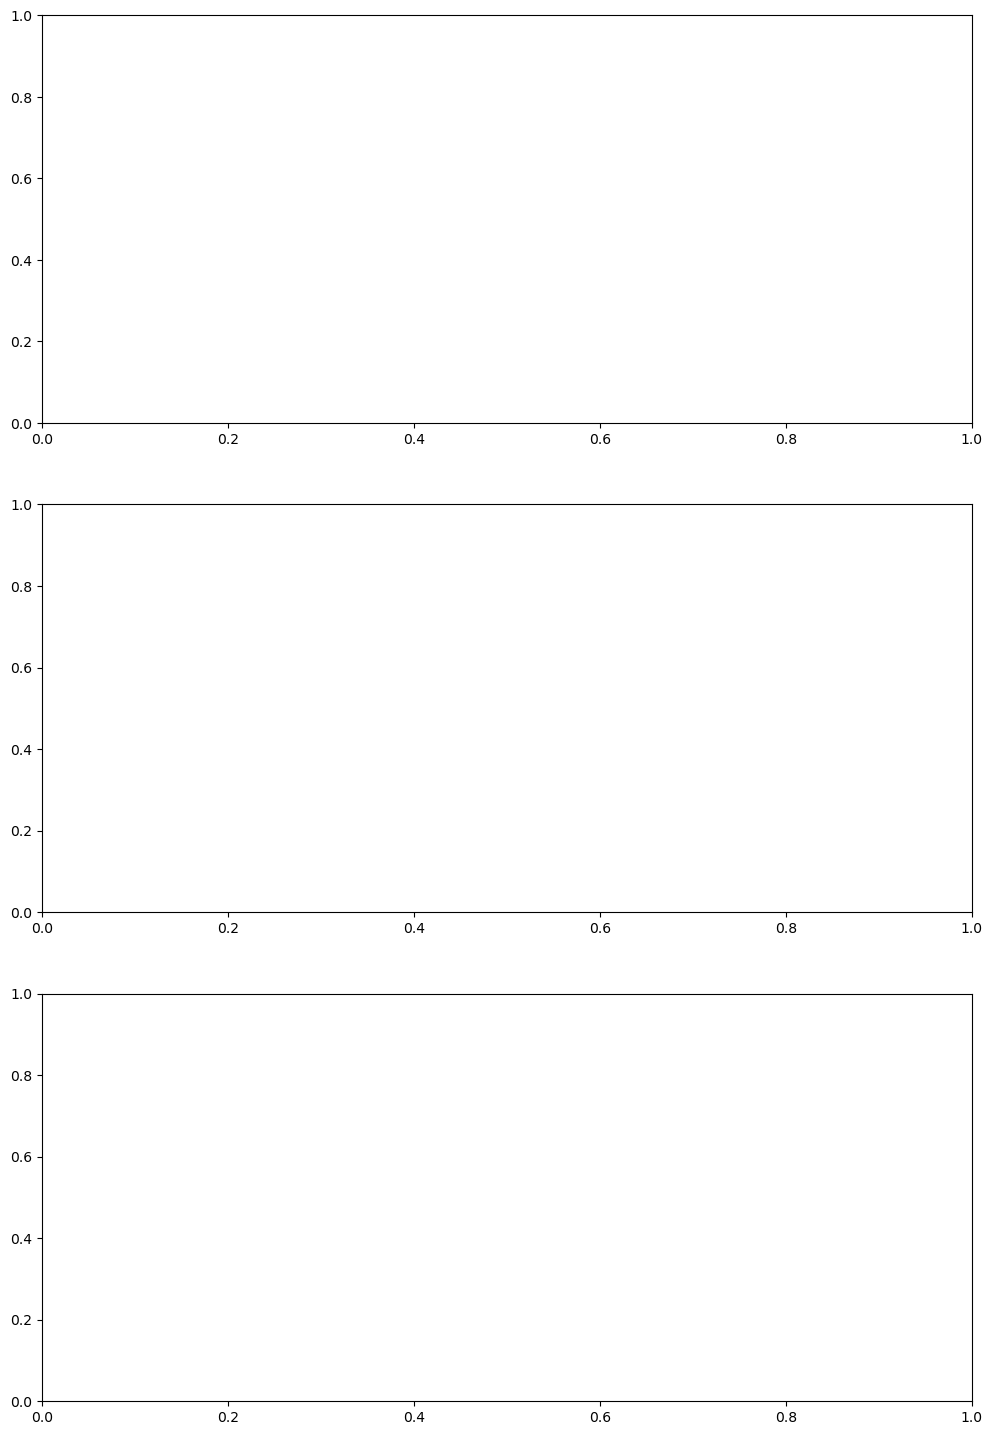

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data is already loaded and preprocessed
# Calculate concentration by multiplying the peak area with k_factor
data['concentration'] = data['areas'] * data['k_factor']

# Identify peaks with labels and select the top 10 prominent peaks (based on peak areas)
top_peaks = data.nlargest(10, 'areas')  # Select top 10 by areas

# Specify which peaks are acids based on your criteria (e.g., a list of known acids)
# For demonstration, let's assume 'acid_labels' is a boolean column indicating detected acids
data['is_acid'] = data['peak_labels'].apply(lambda x: x in ['Acid1', 'Acid2', 'Acid3'])  # Modify as needed

# Create a combined figure
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Define colors
acid_color = "orange"
non_acid_color = "skyblue"

# 1. Concentration (using 'areas') vs retention time for top 10 peaks
sns.barplot(x='areas', y='retention_time', data=top_peaks,
            palette=[acid_color if row['is_acid'] else non_acid_color for _, row in top_peaks.iterrows()], 
            orient='h', ax=axs[0])

axs[0].set_xlabel('Peak Area (proxy for concentration)')
axs[0].set_ylabel('Retention Time (min)')
axs[0].set_title('Top 10 Concentration (Peak Area) vs Retention Time')

# Annotate peaks with lines
for idx, row in top_peaks.iterrows():
    axs[0].text(row['areas'], row['retention_time'], row['peak_labels'], 
                color='black', va='center', ha='right', fontsize=9)
    axs[0].plot([row['areas'], row['areas'] + 10], [row['retention_time'], row['retention_time']], 
                color='black', linestyle='--')  # Horizontal line pointing to label

# 2. Peak Height vs Retention Time (with lines)
sns.lineplot(data=data, x='retention_time', y='peak_hights', ax=axs[1], marker='o', color='purple')
axs[1].set_xlabel('Retention Time (min)')
axs[1].set_ylabel('Peak Height')
axs[1].set_title('Peak Height vs Retention Time')

# Annotate labeled peaks with lines
for idx, row in labeled_peaks.iterrows():
    axs[1].text(row['retention_time'], row['peak_hights'], row['peak_labels'], 
                color=labeled_color, ha='center', fontsize=9)
    axs[1].plot([row['retention_time'], row['retention_time']], [row['peak_hights'], row['peak_hights'] + 1], 
                color=labeled_color, linestyle='--')  # Vertical line pointing to label

# 3. Peak Height vs Area (with lines)
sns.scatterplot(x='areas', y='peak_hights', data=data, color="green", ax=axs[2], label='Data Points')
sns.lineplot(data=data, x='areas', y='peak_hights', ax=axs[2], color='green', label='Trend Line')
axs[2].set_xlabel('Peak Area')
axs[2].set_ylabel('Peak Height')
axs[2].set_title('Peak Height vs Area')

# Annotate labeled peaks with lines
for idx, row in labeled_peaks.iterrows():
    axs[2].text(row['areas'], row['peak_hights'], row['peak_labels'], 
                color=labeled_color, ha='right', fontsize=9)
    axs[2].plot([row['areas'], row['areas']], [row['peak_hights'], row['peak_hights'] + 1], 
                color=labeled_color, linestyle='--')  # Vertical line pointing to label

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Additional code for plotting concentration without error bars
concentration_data = pd.DataFrame({
    'Material': top_peaks['peak_labels'].tolist(),
    'Concentration': top_peaks['concentration'].tolist()
})

# Plot concentration
plt.figure(figsize=(10, 6))
sns.barplot(x='Concentration', y='Material', data=concentration_data, palette='muted', ci=None)
plt.title('Concentration of Detected Materials (Top 10)', fontsize=16)
plt.xlabel('Concentration (mg/L)', fontsize=14)
plt.ylabel('Materials', fontsize=14)
plt.grid(axis='x')

# Add labels to show concentration values on the bars
for index, row in concentration_data.iterrows():
    plt.text(row['Concentration'], index, f"{row['Concentration']:.2f}", color='black', ha="left", va="center")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Display processed data with labeled peaks and unknown peaks for verification
print(data.head())
